<a href="https://colab.research.google.com/github/ayushjakhmola05/Predictive-Analytics-in-Stock-Market/blob/main/StockAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


(1692, 7)

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


None

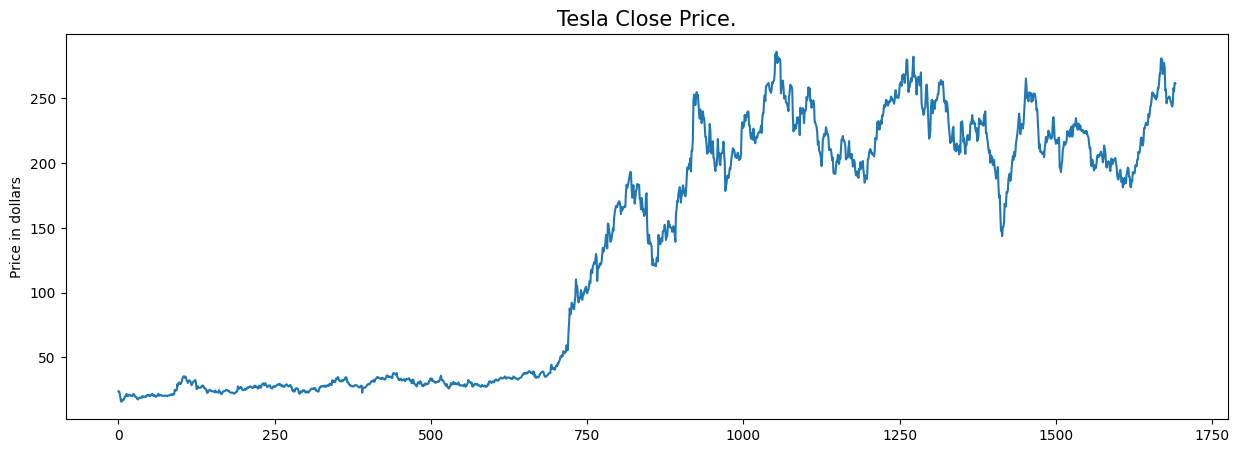

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


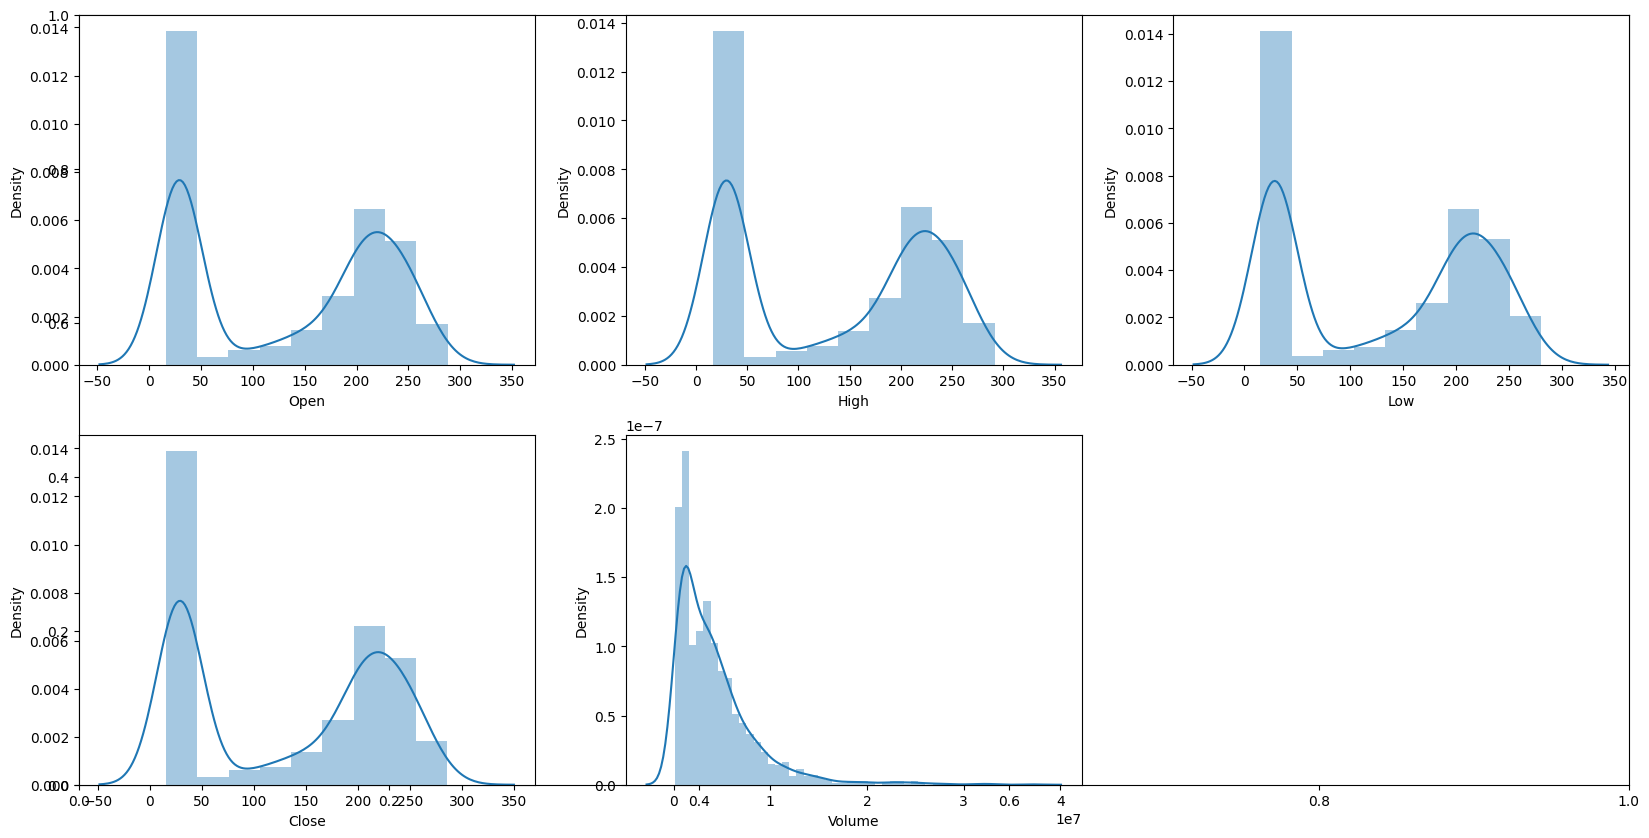

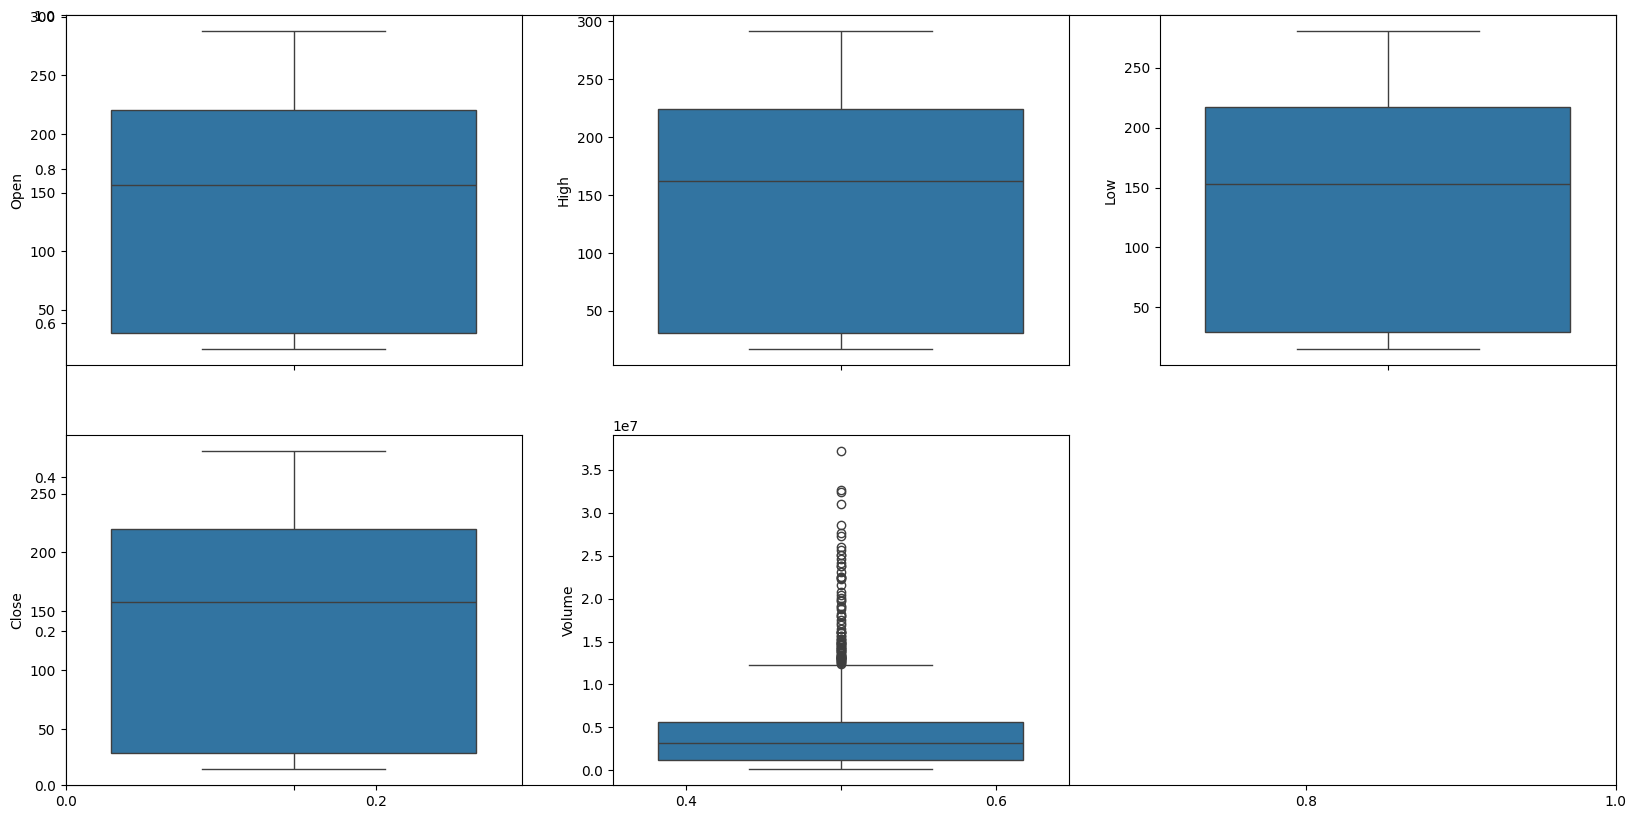

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


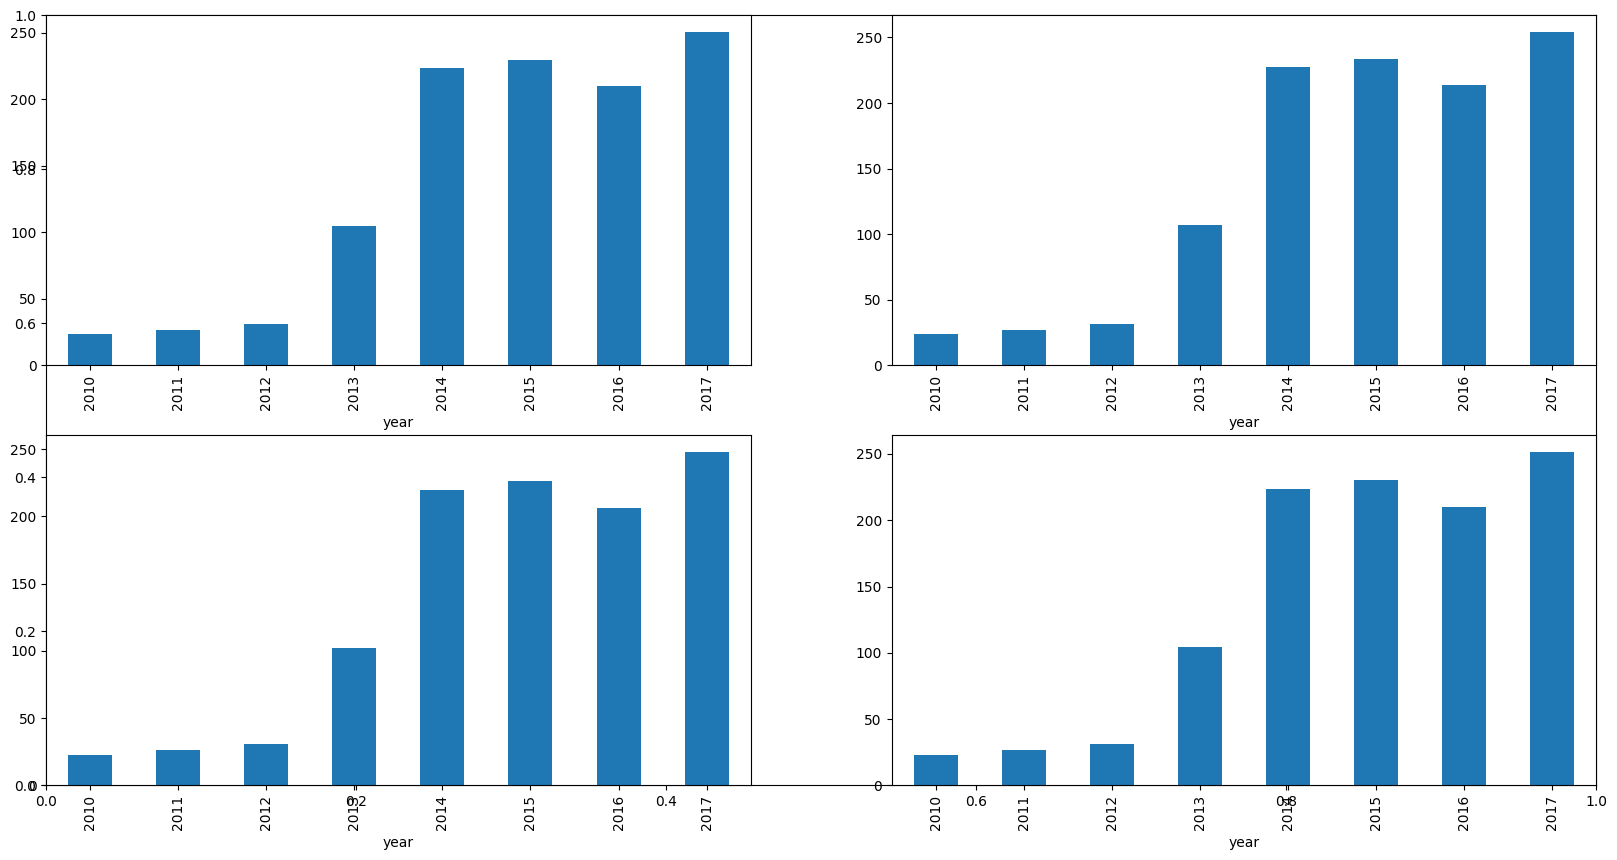

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,130.813739,133.182620,128.257229,130.797709,4.461581e+06,15.686501,6.141208,2013.353464
1,135.679982,137.927032,133.455777,135.673269,3.891084e+06,15.657244,7.584806,2013.314488


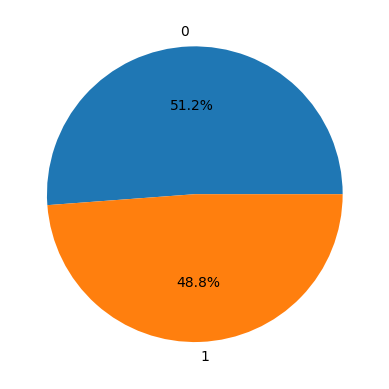

(1522, 3) (170, 3)
LogisticRegression() : 
Training Accuracy :  0.5191606217616581
Validation Accuracy :  0.5436730123180291

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.47156822107081175
Validation Accuracy :  0.4470884658454647

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=Non

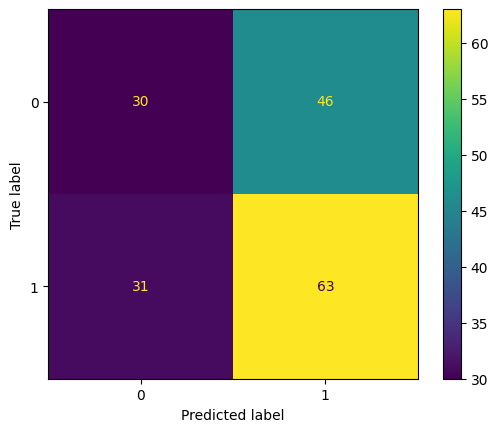

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
import requests

try:
    df = pd.read_csv('/content/Tesla.csv')

# Display DataFrame information
    display(df.head())
    display(df.shape)
    display(df.describe())
    display(df.info())

# DATA ANALYSIS
    plt.figure(figsize=(15, 5))
    plt.plot(df['Close'])
    plt.title('Tesla Close Price.', fontsize=15)
    plt.ylabel('Price in dollars')
    plt.show()

    # Drop 'Adj Close' column if it exists
    if 'Adj Close' in df.columns:
        df = df.drop(['Adj Close'], axis=1)
    else:
        print("Column 'Adj Close' not found in the DataFrame.")

    display(df.isnull().sum())

    features = ['Open', 'High', 'Low', 'Close', 'Volume']

    plt.subplots(figsize=(20, 10))

    for i, col in enumerate(features):
        if col in df.columns: # Check if column exists before plotting
            plt.subplot(2, 3, i + 1)
            sb.distplot(df[col])
        else:
            print(f"Column '{col}' not found in the DataFrame for plotting.")
    plt.show()

    plt.subplots(figsize=(20, 10))
    for i, col in enumerate(features):
      if col in df.columns: # Check if column exists before plotting
        plt.subplot(2,3,i+1)
        sb.boxplot(df[col])
      else:
        print(f"Column '{col}' not found in the DataFrame for plotting.")
    plt.show()


#FEATURE ENGINEERING
    # Ensure 'Date' column is in datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    df['day'] = df['Date'].dt.day
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    display(df.head())

    df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
    display(df.head())

    data_grouped = df.drop('Date', axis=1).groupby('year').mean()
    plt.subplots(figsize=(20,10))
    for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
      if col in data_grouped.columns:
        plt.subplot(2,2,i+1)
        data_grouped[col].plot.bar()
      else:
        print(f"Column '{col}' not found in the grouped DataFrame for plotting.")
    plt.show()

    display(df.drop('Date', axis=1).groupby('is_quarter_end').mean())

    df['open-close']  = df['Open'] - df['Close']
    df['low-high']  = df['Low'] - df['High']
    df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

    plt.pie(df['target'].value_counts().values,
            labels=[0, 1], autopct='%1.1f%%')
    plt.show()

#DATA SPLITTING AND NORMALIZATION
    features = ['open-close', 'low-high', 'is_quarter_end']
    # Ensure all features exist in the DataFrame before selecting
    existing_features = [col for col in features if col in df.columns]
    if not existing_features:
        print("None of the specified features for model training exist in the DataFrame.")
    else:
        features_df = df[existing_features]
        target = df['target']
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features_df)
        X_train, X_valid, Y_train, Y_valid = train_test_split(
            features_scaled, target, test_size=0.1, random_state=2022)
        print(X_train.shape, X_valid.shape)

        models = [LogisticRegression(), SVC(
          kernel='poly', probability=True), XGBClassifier()]

        for i in range(3):
          models[i].fit(X_train, Y_train)
          print(f'{models[i]} : ')
          print('Training Accuracy : ', metrics.roc_auc_score(
            Y_train, models[i].predict_proba(X_train)[:,1]))
          print('Validation Accuracy : ', metrics.roc_auc_score(
            Y_valid, models[i].predict_proba(X_valid)[:,1]))
          print()

        from sklearn.metrics import ConfusionMatrixDisplay
        ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
        plt.show()

except Exception as e:
    print(f"An error occurred during data loading or processing: {e}")